# Credit Card Customer Segmentation with Unsupervised Learning
# I. Business Understanding
## Background and Problem Statement
Credit card business competition is very tight. Customers can easily switch to another credit card that has lower overall fees. According to **How to Retain a Credit Card Customer**, it costs about \$80 to get a new credit card customer who would returns about \$120 a year in profit to the company only if they keep the card. If he drops the card after a few weeks or doesn't use the card, the company will lose the customer acquisition cost (CAC) plus some more money when trying to reactivate them. In addition, Financial Publishing Services also state in their research that CAC is estimated at five times the rate of retaining existing ones. It clearly shows that every credit card issuer must put their best effort to retain their customers. The right retention strategy can increase the company's chances of retaining its customers and further reduce the estimated loss that will be cover by the company.

Customer loyalty is one of a key factor to keep the customers loyal to our company. Why is customer loyalty is important? Customer loyalty is important because; repeat customers spend more than first-time customers, loyal customers produce higher conversion rates, it boosts profits, retaining an existing customer is cheaper than acquiring a new one, customer loyalty helps in effective planning, loyal customer shop regularly, repeat customers spend more during the holiday. We can increase the loyalty of our customers by reward loyal customers with a loyalty program, make customer care a priority for the brand, boost customer experience by introducing VIP tiers, segment and personalize your clients, send event-based emails, optimize the businesses' referral program, encourage customers to give feedback and act on it. We can measure our customer loyalty based on lifetime value, churn rate, referrals, and net promoter code. 

PWDK Bank is one of the credit card issuers in USA. Currently the company only has one type of credit card. In order to serve customers better, the company plan to release new types of credit card based on customer's needs. In this project, we position ourselves as part of the Data Scientist team at PWDK Bank. We were assigned to the marketing division to segment credit card users based on credit card usage in the last 6 months.

## Business Objectives
The business objectives that we want to achieve through this project are as follows:
- Create credit card customer segmentations based on their credit card usage.
- Provide information and suggestion for credit card development based on customer segmentation result

## Data Availability
The data owned by the company is limited to credit card users only. We will use the information from their credit card usage behavior like credit limit, balance, purchases, and payments from the last six months.

## Analytic Approach
Unsupervised learning becomes our machine learning model to address this issue since it didn't have labels. The cleaned dataset will be trained into the unsupervised learning model and the model will generate customer segmentation. The goodness of cluster resulted by the model will be evaluated using clustering evaluation metrics like silhouette scores and within-cluster sum of square (WCSS).

Incorrect segmentation can lead to two possible losses for the bank:
- The first scenario is when we segment customers to a lower cluster when they should be in a higher segment. This scenario can cause the bank to lose the opportunity to make more profits since they tend to spend more money and increase. It also increase the probability of a customer to churn.
- The second scenario is when customers are grouped at a higher segment when they should be at a lower segment. This issue can cause the company to suffer losses if the customer cannot pay his credit card bill or an opportunity loss if the customer didn't fully utilize the balance in their credit card.

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.options.display.max_columns = 30
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3
plt.style.use('seaborn-white')
sns.set_style('white')

# II. Data Understanding
We used <a href="https://www.kaggle.com/arjunbhasin2013/ccdata">Credit Card Dataset for Clustering</a> dataset in Kaggle. The dataset summarizes the usage behavior of 8950 credit card customers during the last 6 months. The file is at a customer level with 18 behavioral variables. The following is a display of the first five rows of the dataset. Below is the definition of each features:
- `CUST_ID` - Identification of credit card customer
- `BALANCE` - Balance amount left in their account to make purchases
- `BALANCE_FREQUENCY` - How frequently the balance is updated, score between 0 and 1 
  - 1 = frequently updated
  - 0 = not frequently updated
- `PURCHASES` - Amount of purchases made from account 
- `ONEOFF` - Maximum purchase amount done in one-go
- `INSTALLMENTS` - Amount of purchase done in installment
- `CASH_ADVANCE` - Cash in advance given by the user
- `PURCHASES_FREQUENCY` - How frequent the purchases are being made, score between 0 and 1
  - 1 = frequently updated
  - 0 = not frequently updated
- `ONEOFF_FREQUENCY` - How frequent purchases are happening in one-go
  - 1 = frequently updated
  - 0 = not frequently updated 
- `INSTALLMENTS_FREQUENCY` - How frequent purchases in installments are being done
  - 1 = frequently updated
  - 0 = not frequently updated 
- `CASH_ADVANCE_FREQUENCY` - How frequently the cash in advance being paid
- `CASH_ADVANCE_TRX` - Number of transactions made with cash in advance 
- `PURCHASES_TRX ` - Number of purchase transactions made 
- `CREDIT_LIMIT` - Limit of credit card for user
- `PAYMENTS` - Amount of payment done by user
- `MINIMUM_PAYMENTS` - Minimum amount of payments made by user
- `PRC_FULL_PAYMENT` - Percent of full payment paid by user
- `TENURE` - Tenure of credit card service for user

In [3]:
# Load dataset
credit_card = pd.read_csv('Dataset/credit_card.csv')
# Rename some columns
credit_card = credit_card.rename(columns={
    'ONEOFF_PURCHASES': 'ONEOFF',
    'INSTALLMENTS_PURCHASES': 'INSTALLMENTS',
    'ONEOFF_PURCHASES_FREQUENCY': 'ONEOFF_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'INSTALLMENTS_FREQUENCY'
})

In [4]:
# Display first 5 rows of the dataset
credit_card.head()

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES   ONEOFF  INSTALLMENTS  \
0  C10001    40.901              0.818      95.40     0.00          95.4   
1  C10002  3202.467              0.909       0.00     0.00           0.0   
2  C10003  2495.149              1.000     773.17   773.17           0.0   
3  C10004  1666.671              0.636    1499.00  1499.00           0.0   
4  C10005   817.714              1.000      16.00    16.00           0.0   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_FREQUENCY  \
0         0.000                0.167             0.000   
1      6442.945                0.000             0.000   
2         0.000                1.000             1.000   
3       205.788                0.083             0.083   
4         0.000                0.083             0.083   

   INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                   0.083                   0.000                 0   
1                   0.000                   0.250                 4   
2                   0.000                   0.000                 0   
3                   0.000                   0.083                 1   
4                   0.000                   0.000                 0   

   PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
0              2        1000.0   201.802           139.510             0.000   
1              0        7000.0  4103.033          1072.340             0.222   
2             12        7500.0   622.067           627.285             0.000   
3              1        7500.0     0.000               NaN             0.000   
4              1        1200.0   678.335           244.791             0.000   

   TENURE  
0      12  
1      12  
2      12  
3      12  
4      12

In [5]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 8950 non-null   object 
 1   BALANCE                 8950 non-null   float64
 2   BALANCE_FREQUENCY       8950 non-null   float64
 3   PURCHASES               8950 non-null   float64
 4   ONEOFF                  8950 non-null   float64
 5   INSTALLMENTS            8950 non-null   float64
 6   CASH_ADVANCE            8950 non-null   float64
 7   PURCHASES_FREQUENCY     8950 non-null   float64
 8   ONEOFF_FREQUENCY        8950 non-null   float64
 9   INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY  8950 non-null   float64
 11  CASH_ADVANCE_TRX        8950 non-null   int64  
 12  PURCHASES_TRX           8950 non-null   int64  
 13  CREDIT_LIMIT            8949 non-null   float64
 14  PAYMENTS                8950 non-null   

# III. Exploratory Data Analysis
## Data Distribution Plot
We check data distribution for each feature using descriptive statistics, histogram, and boxplot. 
- Overall, each feature has right-skewed distribution because of the anomaly behaviors of the small proportion of customers. 
- Majority of customers have `BALANCE` value close to zero. It can be concluded that the company has many active customers
- Not many customers can make full payments on their credit card bills (the largest percentage of `PRC_FULL_PAYMENT` is on zero value)

In [6]:
# Display descriptive statistics
credit_card.describe().transpose()

count      mean       std     min       25%  \
BALANCE                 8950.0  1564.475  2081.532   0.000   128.282   
BALANCE_FREQUENCY       8950.0     0.877     0.237   0.000     0.889   
PURCHASES               8950.0  1003.205  2136.635   0.000    39.635   
ONEOFF                  8950.0   592.437  1659.888   0.000     0.000   
INSTALLMENTS            8950.0   411.068   904.338   0.000     0.000   
CASH_ADVANCE            8950.0   978.871  2097.164   0.000     0.000   
PURCHASES_FREQUENCY     8950.0     0.490     0.401   0.000     0.083   
ONEOFF_FREQUENCY        8950.0     0.202     0.298   0.000     0.000   
INSTALLMENTS_FREQUENCY  8950.0     0.364     0.397   0.000     0.000   
CASH_ADVANCE_FREQUENCY  8950.0     0.135     0.200   0.000     0.000   
CASH_ADVANCE_TRX        8950.0     3.249     6.825   0.000     0.000   
PURCHASES_TRX           8950.0    14.710    24.858   0.000     1.000   
CREDIT_LIMIT            8949.0  4494.449  3638.816  50.000  1600.000   
PAYMENTS                8950.0  1733.144  2895.064   0.000   383.276   
MINIMUM_PAYMENTS        8637.0   864.207  2372.447   0.019   169.124   
PRC_FULL_PAYMENT        8950.0     0.154     0.292   0.000     0.000   
TENURE                  8950.0    11.517     1.338   6.000    12.000   

                             50%       75%        max  
BALANCE                  873.385  2054.140  19043.139  
BALANCE_FREQUENCY          1.000     1.000      1.000  
PURCHASES                361.280  1110.130  49039.570  
ONEOFF                    38.000   577.405  40761.250  
INSTALLMENTS              89.000   468.637  22500.000  
CASH_ADVANCE               0.000  1113.821  47137.212  
PURCHASES_FREQUENCY        0.500     0.917      1.000  
ONEOFF_FREQUENCY           0.083     0.300      1.000  
INSTALLMENTS_FREQUENCY     0.167     0.750      1.000  
CASH_ADVANCE_FREQUENCY     0.000     0.222      1.500  
CASH_ADVANCE_TRX           0.000     4.000    123.000  
PURCHASES_TRX              7.000    17.000    358.000  
CREDIT_LIMIT            3000.000  6500.000  30000.000  
PAYMENTS                 856.902  1901.134  50721.483  
MINIMUM_PAYMENTS         312.344   825.485  76406.208  
PRC_FULL_PAYMENT           0.000     0.143      1.000  
TENURE                    12.000    12.000     12.000

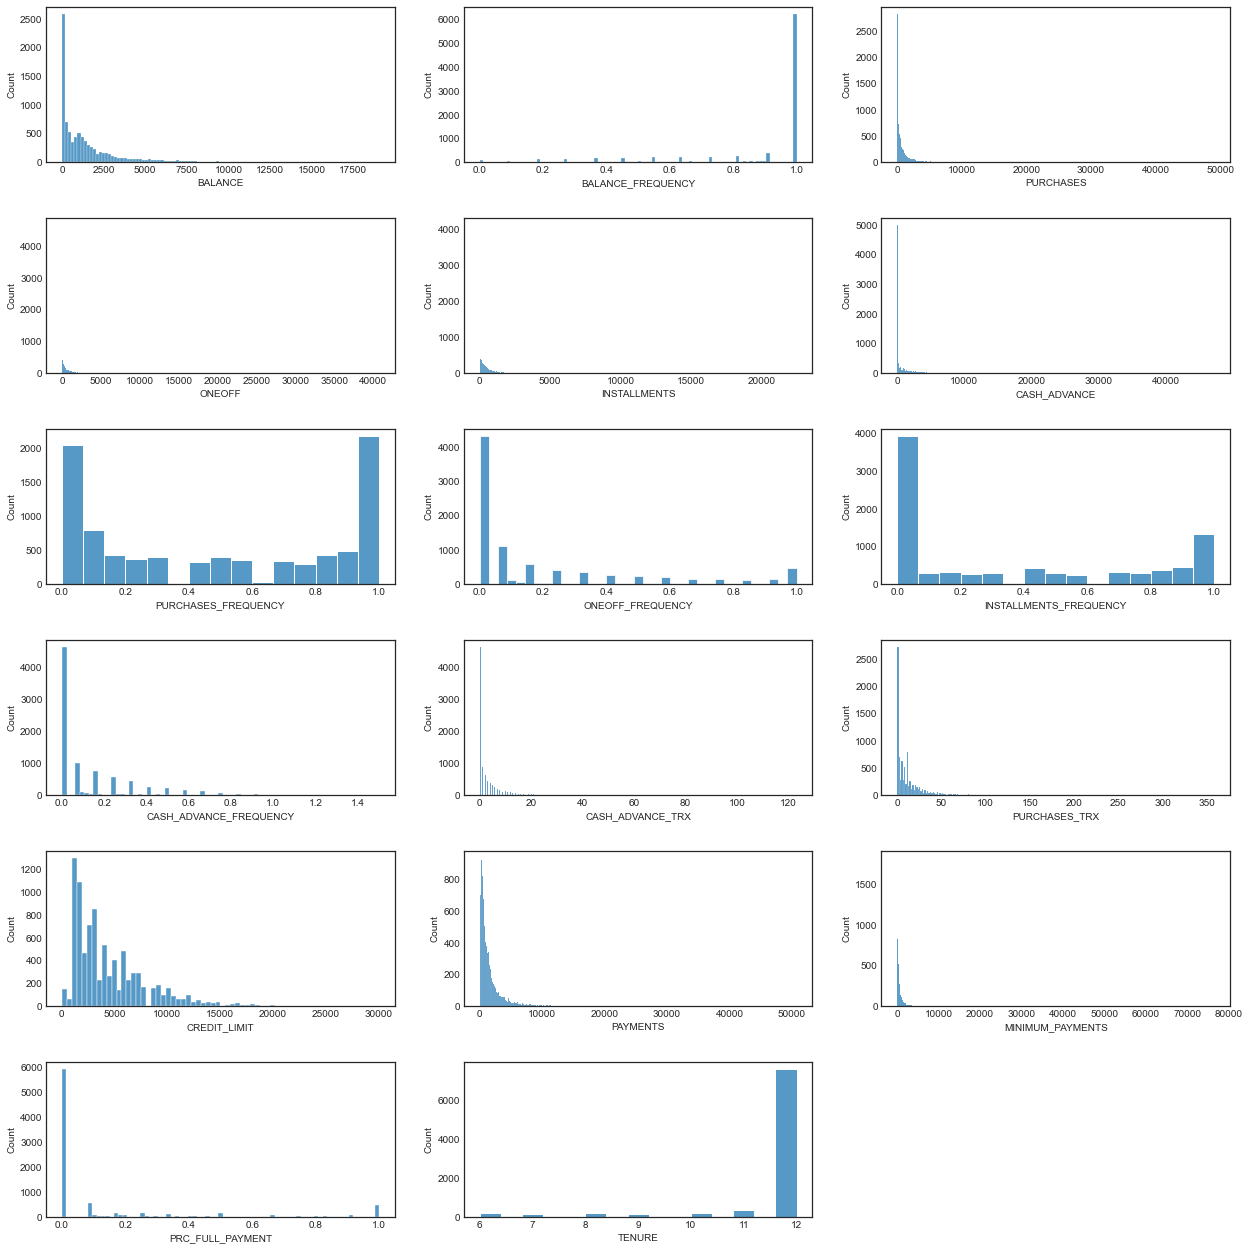

In [7]:
# Generate histogram for each feature
fig, axes = plt.subplots(6, 3, figsize=(18, 18))
for cols, ax in zip(credit_card.select_dtypes('number').columns, axes.flatten()):
    sns.histplot(ax=ax, data=credit_card, x=cols)
plt.gca().axis('off')
plt.tight_layout(pad=3)

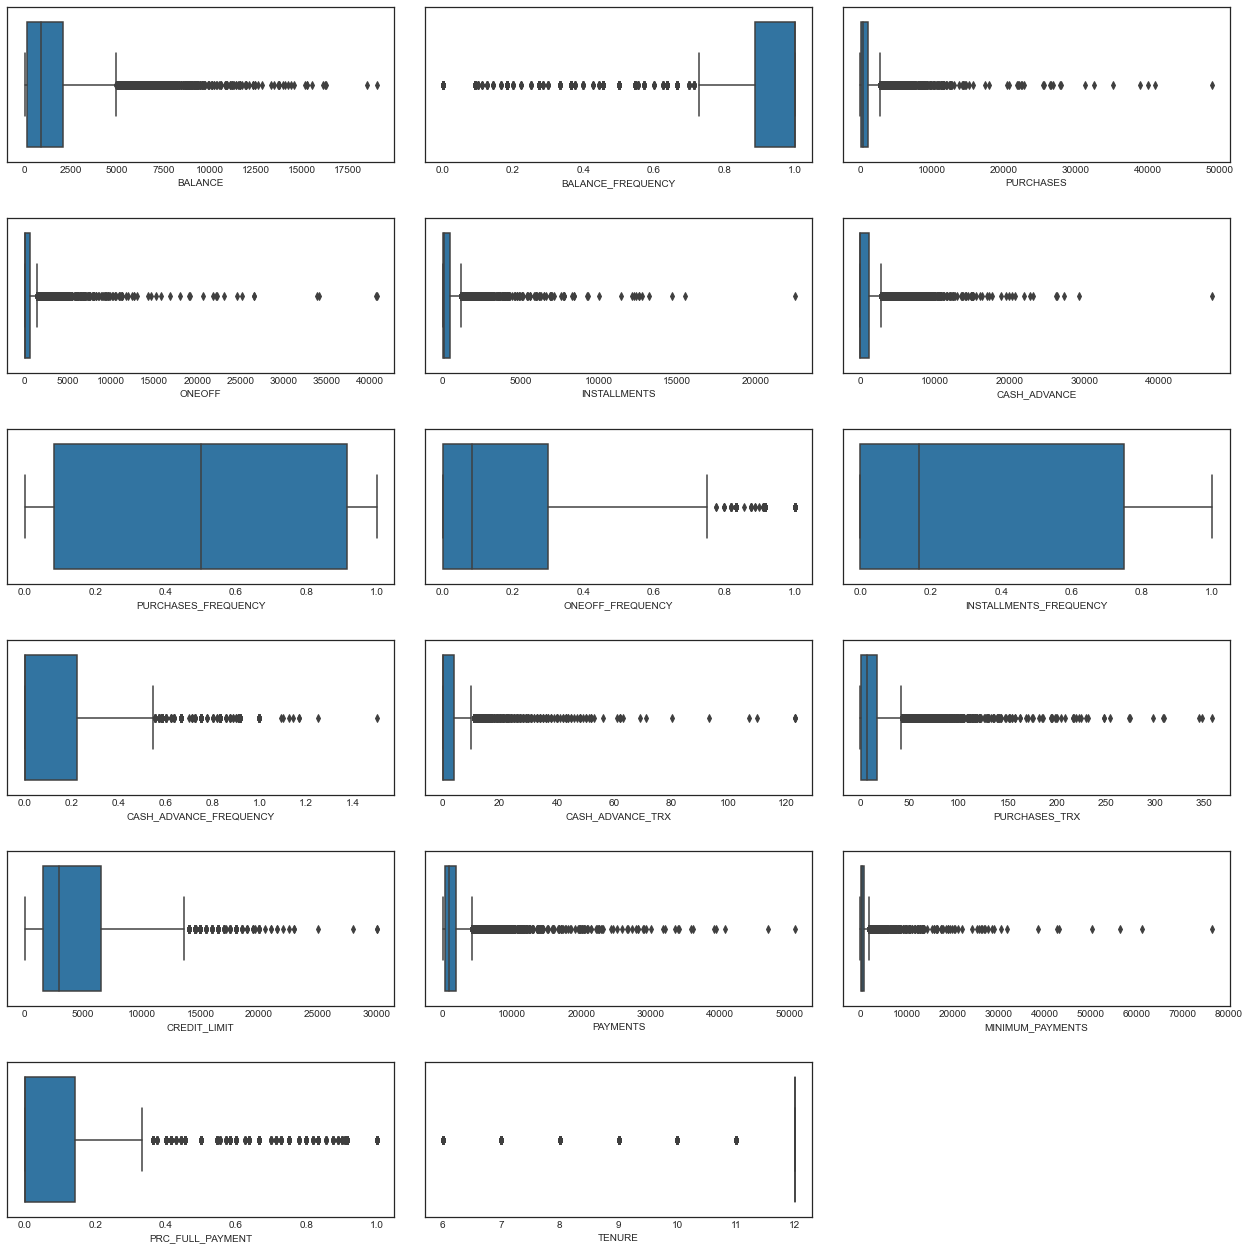

In [8]:
# Generate boxplot for each feature
fig, axes = plt.subplots(6, 3, figsize=(18, 18))
for cols, ax in zip(credit_card.select_dtypes('number').columns, axes.flatten()):
    sns.boxplot(ax=ax, data=credit_card, x=cols)
plt.gca().axis('off')
plt.tight_layout(pad=3)

## Data Correlation
We calculate Spearman's correlation coefficient between features and show the result on a heatmap.
- `PURCHASES` has a strong positive relationship with `PURCHASES_FREQUENCY` and `PURCHASES_TRX`. `CASH_ADVANCE` has a strong positive relationship with `CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX`. Both results show that the high value of `PURCHASES` and 'CASH_ADVANCE` is influenced by the number of transactions and frequency.
- `PURCHASES` also has strong positive relationship with `ONEOFF`, `INSTALLMENTS`, `ONEOFF_FREQUENCY`, and `INSTALLMENTS_FREQUENCY`. If we add the value of `ONEOFF` and `INSTALLMENTS` columns, we will get the same value with the PURCHASES column.

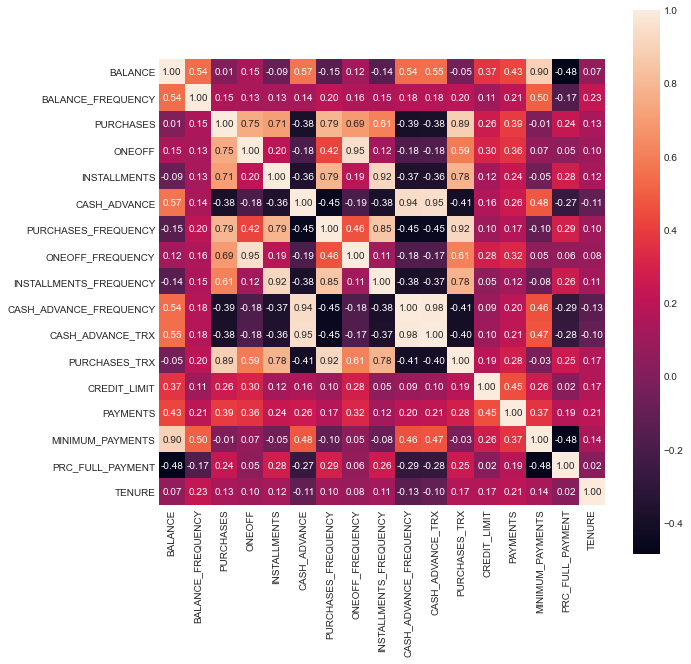

In [9]:
plt.figure(figsize=(10, 10))
corr_matrix = credit_card.corr(method='spearman')
sns.heatmap(corr_matrix, annot=corr_matrix, square=True, fmt='.2f');

## Identify Missing Values, Duplicates, and Outliers 
- There is no duplicate on this dataset.
- There are 313 missing values on `MINIMUM_PAYMENTS` and 1 missing value on `CREDIT_LIMIT`.
- There are many outliers for each feature and we decided not to apply any process to them.

In [10]:
# There is no duplicate on this dataset
credit_card.duplicated().sum()

0

In [11]:
# There are 313 missing values on MINIMUM_PAYMENTS and 1 missing value on CREDIT_LIMIT`
credit_card.isna().sum()

CUST_ID                     0
BALANCE                     0
BALANCE_FREQUENCY           0
PURCHASES                   0
ONEOFF                      0
INSTALLMENTS                0
CASH_ADVANCE                0
PURCHASES_FREQUENCY         0
ONEOFF_FREQUENCY            0
INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY      0
CASH_ADVANCE_TRX            0
PURCHASES_TRX               0
CREDIT_LIMIT                1
PAYMENTS                    0
MINIMUM_PAYMENTS          313
PRC_FULL_PAYMENT            0
TENURE                      0
dtype: int64

In [12]:
# There are many outliers in each feature
outliers = credit_card.describe(exclude='object').transpose()[['25%', '75%']]
outliers['IQR'] = outliers['75%'] - outliers['25%']
outliers['UPPER'] = outliers['75%'] + outliers['IQR']
outliers['LOWER'] = outliers['25%'] - outliers['IQR']

outliers_ = {}
for c in credit_card.select_dtypes('number').columns:
    outliers_[c] = credit_card[(credit_card[c] < outliers.loc[c, 'LOWER']) | (credit_card[c] > outliers.loc[c, 'UPPER'])].shape[0]
outliers_

{'BALANCE': 1015,
 'BALANCE_FREQUENCY': 1755,
 'PURCHASES': 1107,
 'ONEOFF': 1301,
 'INSTALLMENTS': 1160,
 'CASH_ADVANCE': 1327,
 'PURCHASES_FREQUENCY': 0,
 'ONEOFF_FREQUENCY': 1118,
 'INSTALLMENTS_FREQUENCY': 0,
 'CASH_ADVANCE_FREQUENCY': 764,
 'CASH_ADVANCE_TRX': 1065,
 'PURCHASES_TRX': 1042,
 'CREDIT_LIMIT': 528,
 'PAYMENTS': 1112,
 'MINIMUM_PAYMENTS': 1098,
 'PRC_FULL_PAYMENT': 1648,
 'TENURE': 1366}

# IV. Data Preprocessing
## Remove Unnecessary Features
Based on the results of data understanding and exploratory data analysis, we decided not to use `CUST_ID` as input to the machine learning clustering model. `CUST_ID` has a unique value for each entry and does not provide any useful information for customer segmentation.

## Missing Values Handling  
There are 313 missing values on `MINIMUM_PAYMENTS` and 1 missing value on `CREDIT_LIMIT`.
- Missing value in `CREDIT_LIMIT` column is dropped because there is only 1 data that has a null value.
- Missing values in `MINIMUM_PAYMENTS` are filled with zero when the corresponding row also has zero value on the`PAYMENTS`
- For customers whose `PAYMENTS` is not zero, we filled `MINIMUM_PAYMENTS` missing values to be the same as `PAYMENTS`

In [13]:
# Drop CUST_ID column
credit_card = credit_card.drop('CUST_ID', axis=1).copy()

In [14]:
# Function for filling MINIMUM_PAYMENTS missing values with their corresponding PAYMENTS values
def fillna_minimum_payments(df):
    if np.isnan(df['MINIMUM_PAYMENTS']):
        return df['PAYMENTS']
    else:
        return df['MINIMUM_PAYMENTS']

# Drop a missing value in CREDIT_LIMIT
credit_card.dropna(subset=['CREDIT_LIMIT'], inplace=True)

# Fill missing values in MINIMUM PAYMENTS
credit_card['MINIMUM_PAYMENTS'] = credit_card.apply(lambda x: fillna_minimum_payments(x), axis=1)

In [15]:
# All the missing value has been handled, so there is no missing value now.
credit_card.isna().sum()

BALANCE                   0
BALANCE_FREQUENCY         0
PURCHASES                 0
ONEOFF                    0
INSTALLMENTS              0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
ONEOFF_FREQUENCY          0
INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY    0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
PRC_FULL_PAYMENT          0
TENURE                    0
dtype: int64

# V. Customer Segmentation Modeling and Analysis
## Clustering Algorithms
For the modeling process, we used 3 clustering algorithms as below:
- k-Means
- Agglomerative
- Gaussian Mixture Models (GMM)

## Evaluation Metrics
The main evaluation metrics that we used are **silhouette score** and **WCSS (Within-Cluster Sum of Square)**. We can applied silhouette score to evaluate any cluster results and WCSS only to evaluate K-Means cluster results. Silhouette score values range from -1 to 1 and here is the interpretation of 1, 0, and -1.
- 1 : Means clusters are well apart from each other and distinguished
- 0 : Means clusters are indifferent, or we can say that the distance between clusters is not significant. 
- -1 : Means clusters are assigned in the wrong way

## Predefined Functions
We create several functions for displaying cluster evaluation results and generating some plots before the modeling process

### List of cluster evaluation function

1. kmeans_cluster
2. kmeans_eval
3. agglo_cluster
4. agglo_eval
5. gmm_cluster
6. gmm_eval

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Generate a new data frame consisting of the initial data with cluster results using K-Means
def kmeans_cluster(X, n_clusters, random_state, wcss=False): 
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    X_cluster = X.copy()
    X_cluster['CLUSTER'] = kmeans.labels_
    X_cluster['CLUSTER'] = X_cluster['CLUSTER'].astype('category')
    if wcss == True:
        wcss_score = kmeans.inertia_
        return X_cluster, wcss_score
    return X_cluster

# Generate wcss and silhouette score for each k-Means clustering results
def kmeans_eval(X, start, stop, random_state):
    wcss = []
    silhouette = []
    membership = []
    for n in range(start, stop):
        X_cluster, wcss_score = kmeans_cluster(X, n, random_state, wcss=True)
        wcss.append(wcss_score)
        silhouette.append(silhouette_score(X, X_cluster['CLUSTER']))
        membership.append(dict(X_cluster['CLUSTER'].value_counts().sort_index()))
    evaluation = pd.DataFrame({
        'wcss': wcss,
        'silhouette': silhouette,
        'membership': membership
    }, index=range(start, stop))
    evaluation.index.set_names('n_clusters', inplace=True)
    return evaluation

# Generate a new data frame consisting of the initial data with cluster results using Agglomerative clustering
def agglo_cluster(X, n_clusters, linkage):
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    agglo.fit(X)
    X_cluster = X.copy()
    X_cluster['CLUSTER'] = agglo.labels_
    X_cluster['CLUSTER'] = X_cluster['CLUSTER'].astype('category')
    return X_cluster

# Generate silhouette score for each Agglomerative clustering results with all linkage options (single, complete, average, ward)
def agglo_eval(X, start, stop):
    linkages = ['single', 'complete', 'average', 'ward']
    evaluation = pd.DataFrame(
        columns=pd.MultiIndex.from_product([linkages, ['silhouette', 'membership']]),
        index=range(start, stop)
    )
    i = 0
    for linkage in linkages:
        silhouette = []
        membership = []
        for n in range(start, stop):
            X_cluster = agglo_cluster(X, n, linkage)
            silhouette.append(silhouette_score(X, X_cluster['CLUSTER']))
            membership.append(dict(X_cluster['CLUSTER'].value_counts().sort_index()))
        evaluation.iloc[:, i] = silhouette
        evaluation.iloc[:, i+1] = membership
        i += 2
    evaluation.index.set_names('n_clusters', inplace=True)
    return evaluation

# Generate a new data frame consisting of the initial data with cluster results using GMM
def gmm_cluster(X, n_components, covariance, random_state):
    gmm = GaussianMixture(
        n_components=n_components, 
        covariance_type = covariance,
        random_state=random_state
    )
    gmm.fit(X)
    X_cluster = X.copy()
    X_cluster['CLUSTER'] = gmm.predict(X)
    X_cluster['CLUSTER'] = X_cluster['CLUSTER'].astype('category')
    return X_cluster

# Generate silhouette score for each GMM clustering results with all covariance_type options (full, tied, diag, spherical)
def gmm_eval(X, start, stop, random_state):
    covariances = ['full', 'tied', 'spherical', 'diag']
    evaluation = pd.DataFrame(
        columns=pd.MultiIndex.from_product([covariances, ['silhouette', 'membership']]),
        index=range(start, stop)
    )
    i = 0
    for covariance in covariances:
        silhouette = []
        membership = []
        for n in range(start, stop):
            X_cluster = gmm_cluster(X, n, covariance, random_state)
            silhouette.append(silhouette_score(X, X_cluster['CLUSTER']))
            membership.append(dict(X_cluster['CLUSTER'].value_counts().sort_index()))
        evaluation.iloc[:, i] = silhouette
        evaluation.iloc[:, i+1] = membership
        i += 2
    evaluation.index.set_names('n_clusters', inplace=True)
    return evaluation

### List plot function created

1. plot_elbow
2. plot_silhouette
3. plot_scatter
4. plot_scatter_3d
5. plot_violin
6. plot_dendogram

In [53]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
import plotly.offline as py
py.init_notebook_mode()

# Generate lineplot for selecting the optimum number of clusters with elbow method 
def plot_elbow(evaluation, silhouette=False):
    if silhouette == True:
        fig, ax = plt.subplots(1, 2, figsize=(16, 4))
        ax[0].title.set_text('Elbow Method')
        ax[1].title.set_text('Silhouette Score')
        sns.lineplot(ax=ax[0], data=evaluation, x=evaluation.index, y='wcss', marker='o', markersize=8)
        sns.lineplot(ax=ax[1], data=evaluation, x=evaluation.index, y='silhouette', marker='o', markersize=8)
    else:
        plt.figure(figsize=(8, 4))
        sns.lineplot(data=evaluation, x=evaluation.index, y='wcss', marker='o', markerfacecolor='tab:red', markersize=8)
    plt.xticks(ticks=evaluation.index, labels=evaluation.index)

# Generate lineplot for selecting the optimum number of clusters based on silhouette score
def plot_silhouette(evaluation, multiple=False):
    plt.figure(figsize=(8, 4))
    if multiple == True:
        labels = []
        for column in evaluation.columns:
            if column[1] == 'silhouette':
                sns.lineplot(x=evaluation.index, y=evaluation[column], marker='o', markersize=8)
                labels.append(column[0])
        plt.legend(labels, loc=[1.05, 0.35])
    else:
        sns.lineplot(data=evaluation, x=evaluation.index, y='silhouette', marker='o', markersize=8)

    plt.title('Silhouette Score')
    plt.xlabel('n_clusters')
    plt.ylabel('silhoutte')
    plt.xticks(ticks=evaluation.index, labels=evaluation.index)

# Generate scatter matrix based on general clustering results
def plot_scatter(X, selected_cols, clustering, width=1000, height=750):
    fig = px.scatter_matrix(
        data_frame=X, dimensions=selected_cols, color='CLUSTER',
        labels={col:col.replace('_', ' ') for col in selected_cols}
    )
    fig.update_layout(
        template='ggplot2',
        title_text=f'Scatter Matrix of {clustering} Clustering Result',
        title_font_size=24,
        width=width, height=height
    )
    fig.show()

# Generate 3D scatterplot based on general clustering results
def plot_scatter_3d(X, x, y, z, clustering, width=750, height=500):
    fig = px.scatter_3d(
        data_frame=X, x=x, y=y, z=z,
        color='CLUSTER'
    )
    fig.update_layout(
        template='ggplot2',
        title_text='PCA 3D Visualization',
        title_font_size=18,
        width=600, height=400
    )
    fig.show()

# Generate violinplot based on general clustering results
def plot_violin(X, row, column, length, width):
    fig, axes = plt.subplots(row, column, figsize=(length, width))
    for cols, ax in zip(X.select_dtypes('number').columns, axes.ravel()):
        sns.violinplot(data=X, x='CLUSTER', y=cols, palette='Set1', cut=0, ax=ax)
    plt.tight_layout(pad=2)

# Generate dendogram for Agglomerative clustering results
def plot_dendogram(X, **kwargs):
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    linkages = ['single', 'complete', 'average', 'ward']
    for linkage, ax in zip(linkages, axes.flatten()):
        # Create the agglomerative model
        model = AgglomerativeClustering(n_clusters=None, linkage=linkage, distance_threshold=0)
        model.fit(X)
        # Create the counts of samples under each node
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_index in merge:
                if child_index < n_samples:
                    current_count += 1  # leaf node
                else:
                    current_count += counts[child_index - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
        # Plot the corresponding dendrogram
        ax.title.set_text(f'{linkage.title()} Linkage Clustering Dendrogram')
        dendrogram(linkage_matrix, **kwargs, ax=ax)
    plt.tight_layout(pad=3)

## Features Selection
We want to build a model that has high interpretability, so feature selection can be done to reduce the model complexity. Selected features will have significant impact to the cluster results. Feature selection was done in the following procedures:

1. Cluster the dataset using all features and evaluate the results of the clustering for each cluster algorithm
2. Select the optimal number of cluster for each cluster algorithm
3. Generate violinplot for each feature with the number of cluster selected and evaluate the potential significant features visually
4. Create a new dataset by adding the clustering result to the initial dataset
5. Split dataset into train and test by using clustering results column as a targets or labels
6. Train a classification machine learning model that has a feature_importances attribute (decision trees and random forest) with the train set
7. Predict the test set labels outcome with the selected classification machine learning model and make sure it has good evaluation score
8. Generate the feature_importances from the model and analyze it for each cluster algorithm

### K-Means Initial Clustering Performance
Based on the silhouette score below, we were able to find some insight as follows:

1. K-Means has a relatively good and stable silhouette score across all the number clusters
2. The decrease of WCSS also proportional for each addition of the number of clusters

In [18]:
# Generate clusters evaluation using K-Means with all features as input
fs_kmeans = kmeans_eval(credit_card, 2, 7, random_state=0)
fs_kmeans

wcss  silhouette  \
n_clusters                          
2           2.805e+11       0.512   
3           2.339e+11       0.466   
4           2.074e+11       0.466   
5           1.824e+11       0.397   
6           1.638e+11       0.389   

                                                  membership  
n_clusters                                                    
2                                         {0: 1924, 1: 7025}  
3                                 {0: 2295, 1: 6520, 2: 134}  
4                          {0: 6439, 1: 2320, 2: 132, 3: 58}  
5                   {0: 2570, 1: 5640, 2: 25, 3: 673, 4: 41}  
6           {0: 537, 1: 5515, 2: 26, 3: 450, 4: 2363, 5: 58}

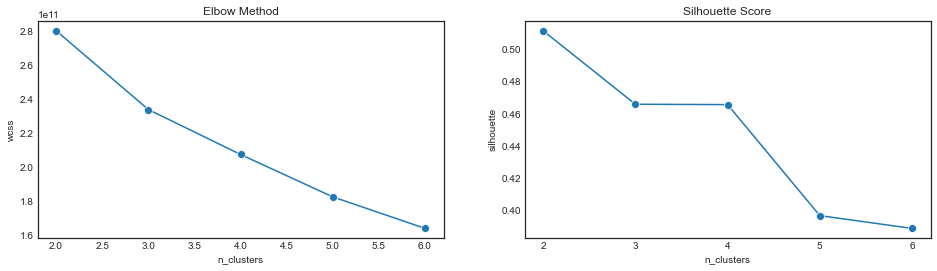

In [19]:
plot_elbow(fs_kmeans, silhouette=True)

### Agglomerative Initial Clustering Performance
Based on the silhouette score below, we were able to find some insight as follows: 

1. **Single Linkage**, **Complete Linkage**, **Average Linkage** have relatively high silhouette scores, but the distribution of cluster membership generated by them is extremely unbalanced. There is always 1 cluster that contains around 8940 customers and the rest distributed to other clusters,
2. We could conclude that **Ward Linkage** is the best out of 4 linkages. The model has a better distribution of cluster membership, although produces the worst silhouette score.

In [20]:
# Generate cluster evaluation using Agglomerative with all feature as input
fs_agglo = agglo_eval(credit_card, 2, 7)
fs_agglo

single                                            complete  \
           silhouette                               membership silhouette   
n_clusters                                                                  
2               0.874                          {0: 8948, 1: 1}      0.813   
3               0.825                    {0: 8947, 1: 1, 2: 1}      0.816   
4               0.825              {0: 8946, 1: 1, 2: 1, 3: 1}      0.815   
5               0.825        {0: 8945, 1: 1, 2: 1, 3: 1, 4: 1}      0.782   
6               0.825  {0: 8944, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}      0.782   

                                                         average  \
                                           membership silhouette   
n_clusters                                                         
2                                    {0: 8928, 1: 21}      0.909   
3                             {0: 8906, 1: 21, 2: 22}      0.885   
4                       {0: 21, 1: 8905, 2: 22, 3: 1}      0.854   
5                 {0: 22, 1: 8905, 2: 17, 3: 1, 4: 4}      0.845   
6           {0: 8905, 1: 20, 2: 17, 3: 1, 4: 4, 5: 2}      0.805   

                                                            ward  \
                                           membership silhouette   
n_clusters                                                         
2                                     {0: 8948, 1: 1}      0.370   
3                               {0: 8947, 1: 1, 2: 1}      0.375   
4                        {0: 22, 1: 8925, 2: 1, 3: 1}      0.343   
5                  {0: 8925, 1: 20, 2: 1, 3: 1, 4: 2}      0.358   
6           {0: 21, 1: 20, 2: 8904, 3: 1, 4: 2, 5: 1}      0.368   

                                                              
                                                  membership  
n_clusters                                                    
2                                         {0: 3580, 1: 5369}  
3                                  {0: 3557, 1: 5369, 2: 23}  
4                         {0: 5369, 1: 1038, 2: 23, 3: 2519}  
5                  {0: 1038, 1: 2519, 2: 23, 3: 95, 4: 5274}  
6           {0: 668, 1: 2519, 2: 370, 3: 95, 4: 5274, 5: 23}

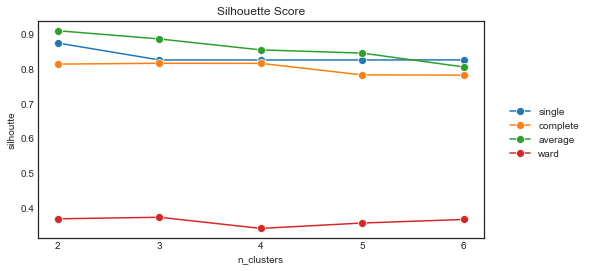

In [21]:
plot_silhouette(fs_agglo, multiple=True)

### GMM Initial Clustering Performance
Based on the silhouette score below, we were able to find some insight as follows: 

1. Silhouette scores are relatively low across all covariances type, but the cluster membership for each cluster are fairly evenly distributed.
2. **Tied Covariance GMM** produces the best silhouette score.

In [22]:
# Generate cluster evaluation using GMM with all feature as input
fs_gmm = gmm_eval(credit_card, 2, 7, random_state=0)
fs_gmm

full                                                        \
           silhouette                                            membership   
n_clusters                                                                    
2               0.485                                    {0: 7749, 1: 1200}   
3               0.069                            {0: 3714, 1: 640, 2: 4595}   
4              -0.171                   {0: 2616, 1: 480, 2: 1920, 3: 3933}   
5              -0.167           {0: 2004, 1: 1641, 2: 915, 3: 3939, 4: 450}   
6              -0.181  {0: 2299, 1: 1188, 2: 756, 3: 2611, 4: 267, 5: 1828}   

                 tied                                                   \
           silhouette                                       membership   
n_clusters                                                               
2               0.518                                {0: 8164, 1: 785}   
3               0.508                         {0: 8118, 1: 740, 2: 91}   
4               0.316                 {0: 7882, 1: 824, 2: 219, 3: 24}   
5               0.333         {0: 7465, 1: 558, 2: 126, 3: 21, 4: 779}   
6               0.339  {0: 562, 1: 47, 2: 122, 3: 22, 4: 777, 5: 7419}   

            spherical                                                         \
           silhouette                                             membership   
n_clusters                                                                     
2               0.359                                     {0: 5072, 1: 3877}   
3               0.225                            {0: 3523, 1: 3888, 2: 1538}   
4               0.113                    {0: 2304, 1: 2886, 2: 2768, 3: 991}   
5               0.101            {0: 2116, 1: 981, 2: 2368, 3: 659, 4: 2825}   
6               0.065  {0: 2239, 1: 1961, 2: 1678, 3: 638, 4: 1130, 5: 1303}   

                 diag                                                       
           silhouette                                           membership  
n_clusters                                                                  
2               0.314                                   {0: 5692, 1: 3257}  
3               0.023                          {0: 4344, 1: 2342, 2: 2263}  
4               0.011                 {0: 2031, 1: 3847, 2: 1217, 3: 1854}  
5              -0.037         {0: 2030, 1: 1250, 2: 1155, 3: 665, 4: 3849}  
6              -0.035  {0: 2024, 1: 1371, 2: 327, 3: 525, 4: 4091, 5: 611}

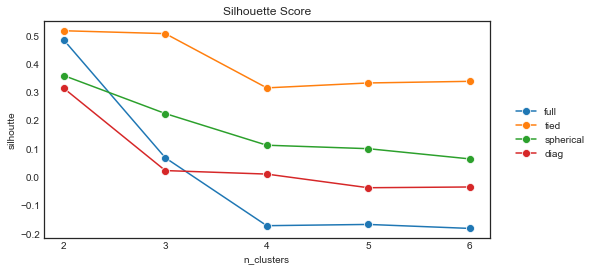

In [23]:
plot_silhouette(fs_gmm, multiple=True)

In [24]:
X_fs_kmeans = kmeans_cluster(credit_card, 4, random_state=0) #  K-Means 4 clusters
X_fs_agglo = agglo_cluster(credit_card, 3, 'ward') # Ward linkage 3 clusters
X_fs_gmm = gmm_cluster(credit_card, 3, 'tied', random_state=0) # Tie covariance GMM 3 clusters

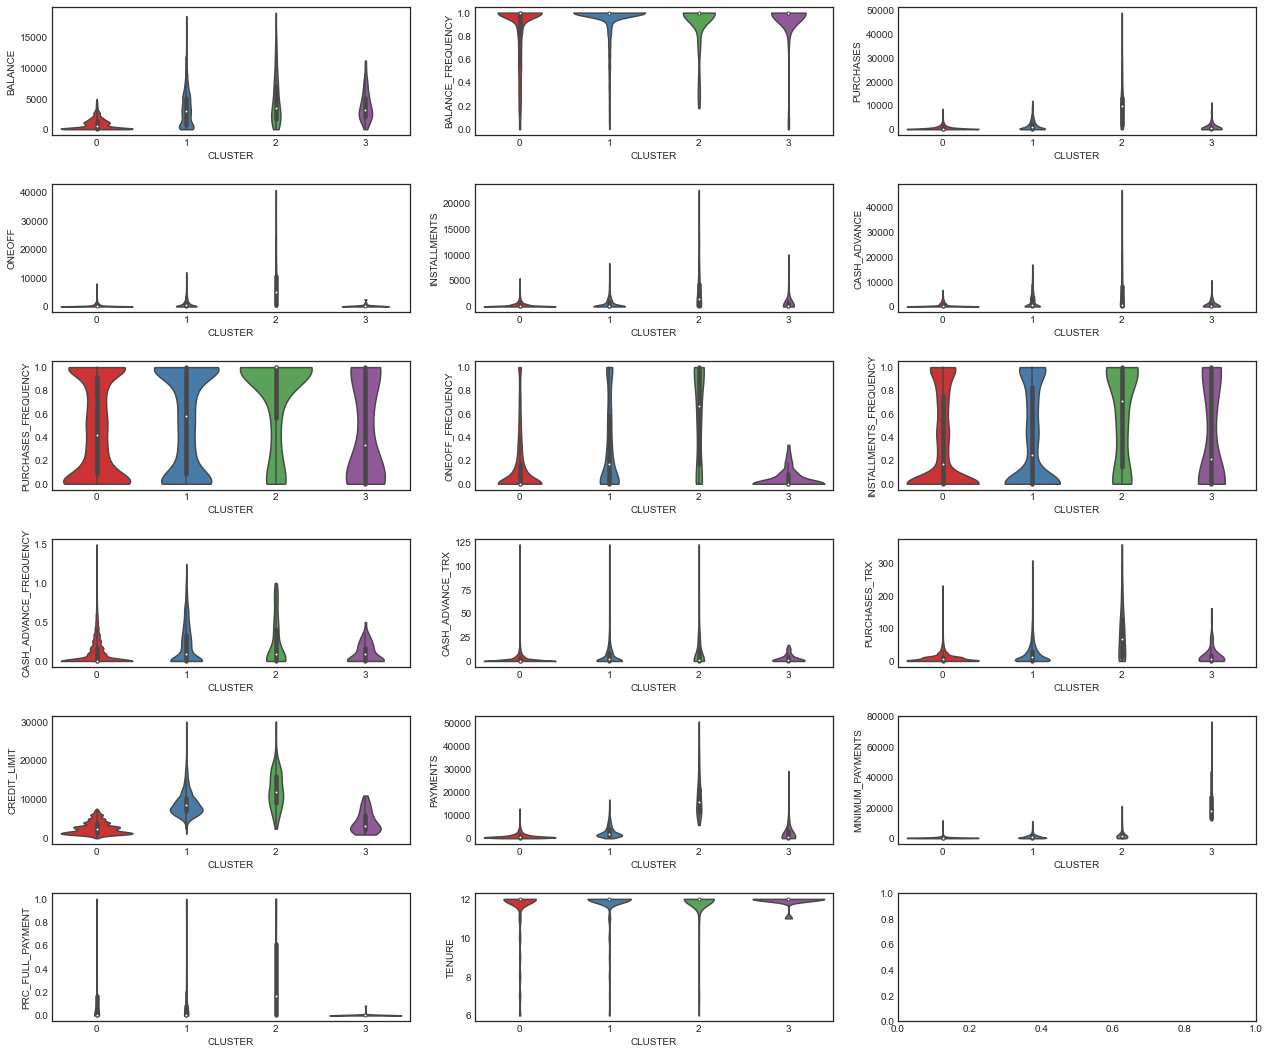

In [25]:
# try to see which features affect the current cluster of K-MEANS using all features.
plot_violin(X_fs_kmeans, 6, 3, 18, 15)

Based on violinplot above, we could see there are few variables affect to the cluster results.

1. `BALANCE`
2. `PURCHASES` (`ONEOFF` and `INSTALLMENTS` feature is already covered by `PURCHASES`)
3. `CASH ADVANCE`
4. `CREDIT_LIMIT`
5. `PAYMENTS`
6. `MINIMUM_PAYMENTS`

In [26]:
from sklearn.model_selection import train_test_split

# Split K-Means cluster results dataset
X = X_fs_kmeans.drop('CLUSTER', axis=1)
y = X_fs_kmeans['CLUSTER']
X_kmeans_train, X_kmeans_test, y_kmeans_train, y_kmeans_test = train_test_split(X, y, stratify=y, random_state=0)

# Split Agglomerative cluster results dataset
X = X_fs_agglo.drop('CLUSTER', axis=1)
y = X_fs_agglo['CLUSTER']
X_agglo_train, X_agglo_test, y_agglo_train, y_agglo_test = train_test_split(X, y, stratify=y, random_state=0)

# Split GMM cluster results dataset
X = X_fs_gmm.drop('CLUSTER', axis=1)
y = X_fs_gmm['CLUSTER']
X_gmm_train, X_gmm_test, y_gmm_train, y_gmm_test = train_test_split(X, y, stratify=y, random_state=0)

In [27]:
# Build random forest classifiers to classify the labels for each clustering algorithm cluster dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

rf_kmeans = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
).fit(X_kmeans_train, y_kmeans_train)

rf_agglo = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
).fit(X_agglo_train, y_agglo_train)

rf_gmm = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
).fit(X_gmm_train, y_gmm_train)

In [28]:
# Random Forest performance evaluation using accuracy, recall, and precision scores
general_eval = pd.DataFrame(
    index=['accuracy', 'recall', 'precision'],
    columns=['kmeans', 'agglomerative', 'gmm']
)
i = 0
rf_list = [rf_kmeans, rf_agglo, rf_gmm]
X_tests = [X_kmeans_test, X_agglo_test, X_gmm_test]
y_tests = [y_kmeans_test, y_agglo_test, y_gmm_test]

for rf, X, y in zip(rf_list, X_tests, y_tests):    
    metric_scores = []
    metric_scores.append(np.round(accuracy_score(y, rf.predict(X)), 3))
    metric_scores.append(np.round(recall_score(y, rf.predict(X), average='macro'), 3))
    metric_scores.append(np.round(precision_score(y, rf.predict(X), average='macro'), 3))
    general_eval.iloc[:, i] = metric_scores
    i += 1
general_eval

kmeans  agglomerative   gmm
accuracy    0.982          0.977  0.99
recall      0.893          0.928  0.91
precision   0.990          0.930  0.96

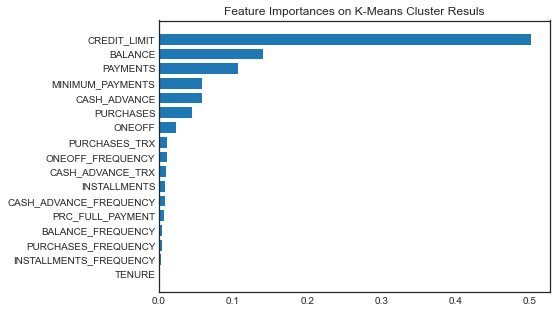

In [29]:
sorted_index = rf_kmeans.feature_importances_.argsort()
plt.figure(figsize=(7, 5))
plt.title('Feature Importances on K-Means Cluster Resuls')
plt.barh(X_kmeans_train.columns[sorted_index], rf_kmeans.feature_importances_[sorted_index]);

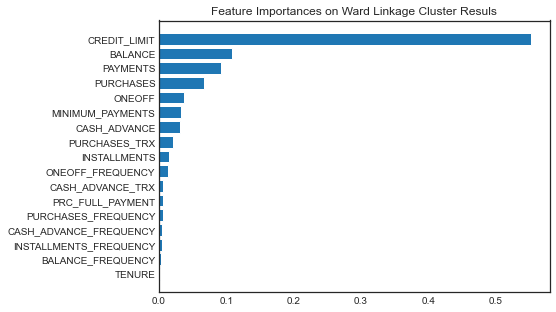

In [30]:
sorted_index = rf_agglo.feature_importances_.argsort()
plt.figure(figsize=(7, 5))
plt.title('Feature Importances on Ward Linkage Cluster Resuls')
plt.barh(X_agglo_train.columns[sorted_index], rf_agglo.feature_importances_[sorted_index]);

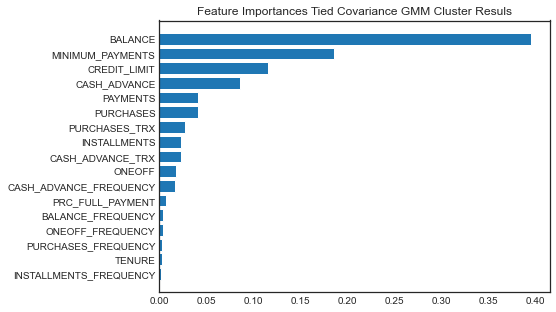

In [31]:
sorted_index = rf_gmm.feature_importances_.argsort()
plt.figure(figsize=(7, 5))
plt.title('Feature Importances Tied Covariance GMM Cluster Resuls')
plt.barh(X_gmm_train.columns[sorted_index], rf_gmm.feature_importances_[sorted_index]);

Based on feature importances from Random Forest Classifier using 3 clustering algorithms (K-Means, Agglomerative, GMM), we could see top 5 features are: 

1. **K-Means** : `CREDIT_LIMIT`, `BALANCE`, `PAYMENTS`, `MINIMUM_PAYMENTS`, `CASH_ADVANCE`
2. **Agglomerative** : `CREDIT_LIMIT`, `BALANCE`, `PAYMENTS`, `PURCHASES`, `ONEOFF`
3. **GMM** : `BALANCE`, `MINIMUM_PAYMENTS`, `CREDIT_LIMIT`, `CASH_ADVANCE`, `PURCHASES`

Based on the feature importances above, we choose 3 features:

1. `BALANCE`
2. `CREDIT_LIMIT`
3. `PAYMENTS`

In [32]:
# Create a subset of dataset that contains only 3 selected features 
selected_cols = ['BALANCE', 'CREDIT_LIMIT', 'PAYMENTS']
X_selected = credit_card[selected_cols]

## Cluster Modeling   
### K-Means Algorithm

In [33]:
# Generate clusters evaluation using K-Means with 3 selected features as input
kmeans_evaluation = kmeans_eval(X_selected, 2, 11, random_state=0)
kmeans_evaluation

wcss  silhouette  \
n_clusters                          
2           1.322e+11       0.548   
3           9.848e+10       0.519   
4           7.755e+10       0.448   
5           6.571e+10       0.463   
6           5.727e+10       0.453   
7           5.076e+10       0.444   
8           4.542e+10       0.428   
9           4.088e+10       0.348   
10          3.760e+10       0.360   

                                                                                   membership  
n_clusters                                                                                     
2                                                                          {0: 2069, 1: 6880}  
3                                                                  {0: 2462, 1: 6298, 2: 189}  
4                                                           {0: 2671, 1: 5276, 2: 905, 3: 97}  
5                                                   {0: 5315, 1: 84, 2: 691, 3: 536, 4: 2323}  
6                                           {0: 5199, 1: 2223, 2: 430, 3: 511, 4: 85, 5: 501}  
7                                   {0: 5157, 1: 888, 2: 322, 3: 80, 4: 1571, 5: 492, 6: 439}  
8                           {0: 909, 1: 297, 2: 56, 3: 523, 4: 268, 5: 1669, 6: 4595, 7: 632}  
9                  {0: 2099, 1: 275, 2: 1150, 3: 56, 4: 3447, 5: 276, 6: 794, 7: 597, 8: 255}  
10          {0: 3642, 1: 1178, 2: 251, 3: 91, 4: 624, 5: 750, 6: 1810, 7: 330, 8: 249, 9: 24}

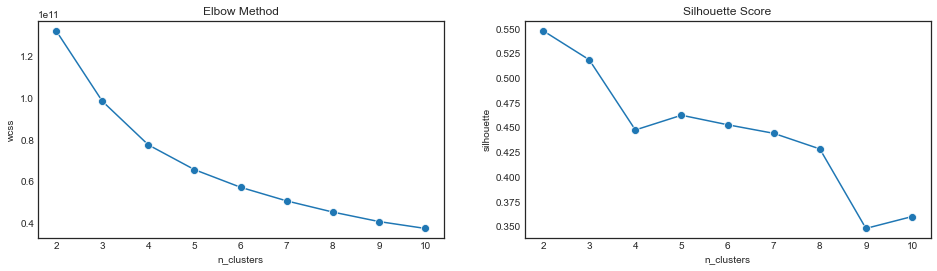

In [34]:
plot_elbow(kmeans_evaluation, silhouette=True)

In [55]:
# Choose 3 clusters based on elbow method and silhouette score for K-Means
X_kmeans = kmeans_cluster(X_selected, 3, random_state=0) 
plot_scatter(X_kmeans, selected_cols, 'k-Means', 1000, 750)

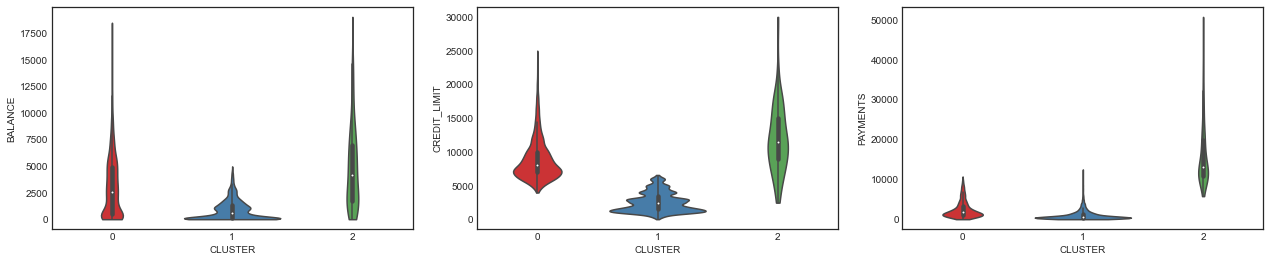

In [36]:
plot_violin(X_kmeans, 1, 3, 18, 4)

### Agglomerative Clustering
1. Single Linkage Clustering
2. Complete Linkage Clustering
3. Average Linkage Clustering
4. Ward Linkage Clustering

In [37]:
# Generate clusters evaluation using Agglomerative with 3 selected features as input
agglo_evaluation = agglo_eval(X_selected, 2, 11)
agglo_evaluation

single  \
           silhouette   
n_clusters              
2               0.888   
3               0.840   
4               0.840   
5               0.840   
6               0.841   
7               0.774   
8               0.773   
9               0.773   
10              0.771   

                                                                             \
                                                                 membership   
n_clusters                                                                    
2                                                           {0: 8948, 1: 1}   
3                                                     {0: 8946, 1: 1, 2: 2}   
4                                               {0: 8945, 1: 1, 2: 2, 3: 1}   
5                                         {0: 8944, 1: 1, 2: 2, 3: 1, 4: 1}   
6                                   {0: 8941, 1: 1, 2: 3, 3: 1, 4: 1, 5: 2}   
7                             {0: 8940, 1: 1, 2: 3, 3: 1, 4: 1, 5: 2, 6: 1}   
8                       {0: 8939, 1: 1, 2: 3, 3: 1, 4: 1, 5: 2, 6: 1, 7: 1}   
9                 {0: 8935, 1: 4, 2: 3, 3: 1, 4: 1, 5: 2, 6: 1, 7: 1, 8: 1}   
10          {0: 3, 1: 4, 2: 2, 3: 1, 4: 8933, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1}   

             complete  \
           silhouette   
n_clusters              
2               0.812   
3               0.701   
4               0.700   
5               0.673   
6               0.673   
7               0.547   
8               0.546   
9               0.545   
10              0.541   

                                                                                    \
                                                                        membership   
n_clusters                                                                           
2                                                                 {0: 8915, 1: 34}   
3                                                         {0: 34, 1: 123, 2: 8792}   
4                                                  {0: 123, 1: 11, 2: 8792, 3: 23}   
5                                            {0: 11, 1: 23, 2: 8792, 3: 65, 4: 58}   
6                                       {0: 8792, 1: 23, 2: 9, 3: 65, 4: 58, 5: 2}   
7                               {0: 23, 1: 65, 2: 9, 3: 8395, 4: 58, 5: 2, 6: 397}   
8                         {0: 65, 1: 58, 2: 9, 3: 8395, 4: 20, 5: 2, 6: 397, 7: 3}   
9                  {0: 58, 1: 8395, 2: 9, 3: 20, 4: 20, 5: 2, 6: 397, 7: 3, 8: 45}   
10          {0: 8395, 1: 20, 2: 9, 3: 35, 4: 20, 5: 2, 6: 397, 7: 3, 8: 45, 9: 23}   

              average  \
           silhouette   
n_clusters              
2               0.865   
3               0.775   
4               0.750   
5               0.750   
6               0.749   
7               0.725   
8               0.725   
9               0.587   
10              0.585   

                                                                                  \
                                                                      membership   
n_clusters                                                                         
2                                                                {0: 8942, 1: 7}   
3                                                          {0: 8941, 1: 7, 2: 1}   
4                                                   {0: 7, 1: 72, 2: 1, 3: 8869}   
5                                             {0: 5, 1: 72, 2: 1, 3: 8869, 4: 2}   
6                                       {0: 72, 1: 8869, 2: 1, 3: 4, 4: 2, 5: 1}   
7                                {0: 15, 1: 8869, 2: 57, 3: 4, 4: 2, 5: 1, 6: 1}   
8                          {0: 8869, 1: 4, 2: 57, 3: 14, 4: 2, 5: 1, 6: 1, 7: 1}   
9                  {0: 57, 1: 4, 2: 563, 3: 14, 4: 2, 5: 1, 6: 1, 7: 1, 8: 8306}   
10          {0: 563, 1: 4, 2: 27, 3: 14, 4: 30, 5: 1, 6: 1, 7: 1, 8: 8306, 9: 2}   

                 ward  \
           silhouette   
n_clusters              
2               0.559   
3               0.546

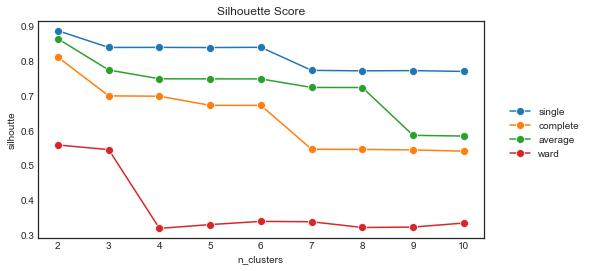

In [38]:
plot_silhouette(agglo_evaluation, multiple=True)

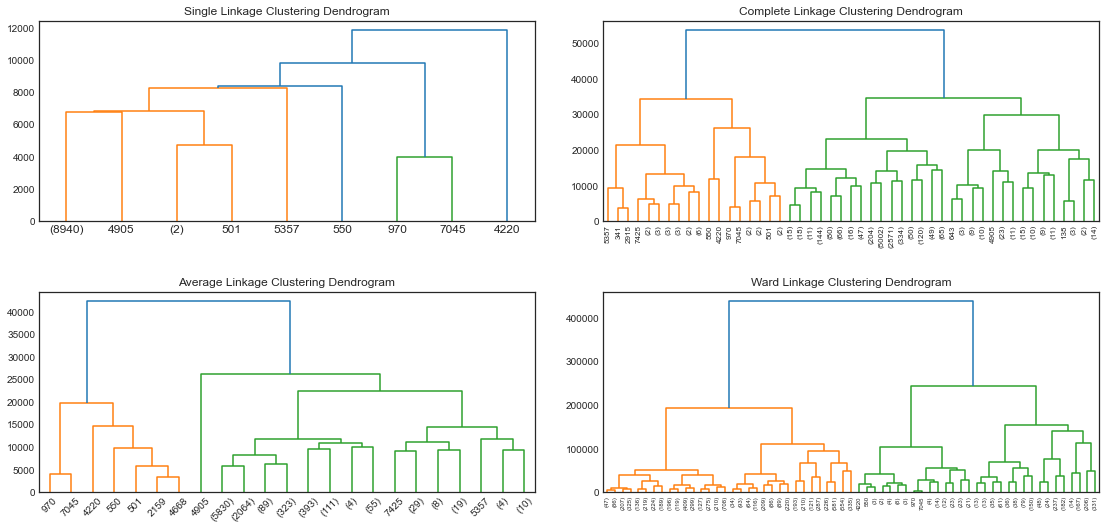

In [39]:
plot_dendogram(X_selected, truncate_mode='level', p=5)

In [56]:
# Choose 3 clusters based on silhouette score and cluster membership distribution for Agglomerative
X_agglo = agglo_cluster(X_selected, 3, 'ward')
plot_scatter(X_agglo, selected_cols, 'Ward Linkage', 1000, 750)

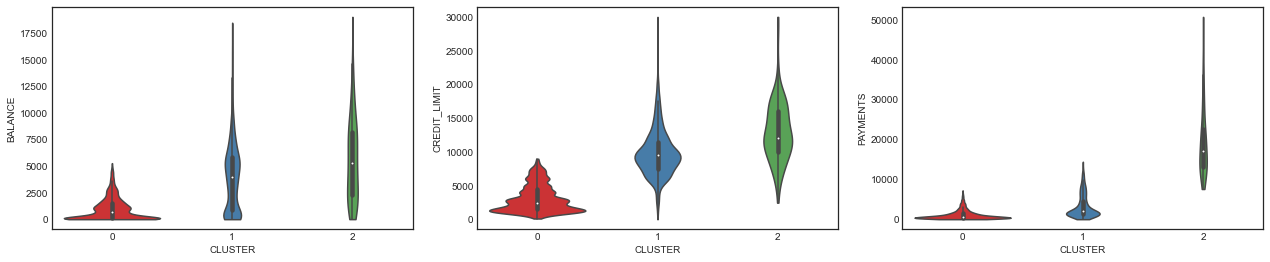

In [41]:
plot_violin(X_agglo, 1, 3, 18, 4)

### Gaussian Mixture Models (GMM)
GMM has different covariance type options:
- **full** : each component has its own general covariance matrix
- **tied** : all components share the same general covariance matrix
- **spherical** : each component has its own diagonal covariance matrix
- **diag** : each component has its own single variance

In [42]:
# Generate clusters evaluation using GMM with 3 selected features as input
gmm_evaluation = gmm_eval(X_selected, 2, 11, random_state=0)
gmm_evaluation

full  \
           silhouette   
n_clusters              
2               0.444   
3               0.294   
4               0.066   
5               0.051   
6               0.040   
7               0.056   
8               0.036   
9               0.037   
10              0.030   

                                                                                                  \
                                                                                      membership   
n_clusters                                                                                         
2                                                                             {0: 5954, 1: 2995}   
3                                                                    {0: 3978, 1: 3899, 2: 1072}   
4                                                            {0: 2267, 1: 2324, 2: 3427, 3: 931}   
5                                                   {0: 2080, 1: 1633, 2: 2333, 3: 2306, 4: 597}   
6                                          {0: 1590, 1: 1336, 2: 2052, 3: 1905, 4: 773, 5: 1293}   
7                                 {0: 1537, 1: 1343, 2: 1328, 3: 1256, 4: 517, 5: 1466, 6: 1502}   
8                         {0: 1469, 1: 1183, 2: 306, 3: 1136, 4: 1087, 5: 968, 6: 1249, 7: 1551}   
9                 {0: 1034, 1: 1245, 2: 271, 3: 1225, 4: 1100, 5: 484, 6: 964, 7: 1073, 8: 1553}   
10          {0: 907, 1: 1218, 2: 156, 3: 860, 4: 1086, 5: 671, 6: 1188, 7: 962, 8: 1513, 9: 388}   

                 tied  \
           silhouette   
n_clusters              
2               0.509   
3               0.508   
4               0.518   
5               0.533   
6               0.454   
7               0.469   
8               0.471   
9               0.401   
10              0.355   

                                                                                             \
                                                                                 membership   
n_clusters                                                                                    
2                                                                         {0: 8112, 1: 837}   
3                                                                 {0: 8069, 1: 778, 2: 102}   
4                                                          {0: 7533, 1: 570, 2: 749, 3: 97}   
5                                                  {0: 7334, 1: 505, 2: 657, 3: 397, 4: 56}   
6                                         {0: 6469, 1: 1242, 2: 170, 3: 378, 4: 53, 5: 637}   
7                                 {0: 6207, 1: 794, 2: 166, 3: 354, 4: 55, 5: 178, 6: 1195}   
8                         {0: 512, 1: 139, 2: 31, 3: 763, 4: 112, 5: 165, 6: 6186, 7: 1041}   
9                   {0: 503, 1: 414, 2: 26, 3: 764, 4: 89, 5: 163, 6: 6150, 7: 722, 8: 118}   
10          {0: 640, 1: 577, 2: 22, 3: 755, 4: 216, 5: 165, 6: 5981, 7: 423, 8: 115, 9: 55}   

            spherical  \
           silhouette   
n_clusters              
2               0.436   
3               0.366   
4               0.335   
5               0.345   
6               0.228   
7               0.253   
8               0.263   
9               0.308   
10              0.300   

                                                                                                \
                                                                                    membership   
n_clusters                                                                                       
2                                                                           {0: 5123, 1: 3826}   
3                                                                  {0: 4136, 1: 3728, 2: 1085}   
4                                                          {0: 3827, 1: 3215, 2: 1712, 3: 195}   
5                                                  {0: 3835, 1: 3222, 2: 1437, 3: 234, 4: 221}   
6                                          {0: 2382, 1: 2907, 2: 913, 3: 431, 4: 410, 

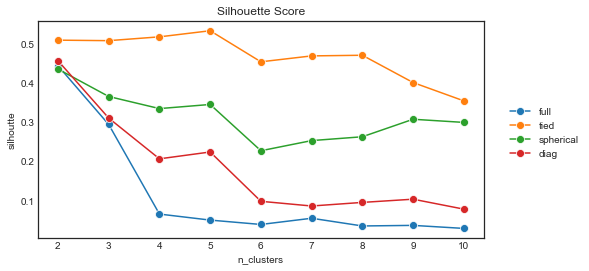

In [43]:
plot_silhouette(gmm_evaluation, multiple=True)

In [44]:
# Choose 3 clusters based on silhouette score and cluster membership distribution for GMM
X_gmm = gmm_cluster(X_selected, 3, 'tied', random_state=0)
plot_scatter(X_gmm, selected_cols, 'GMM')

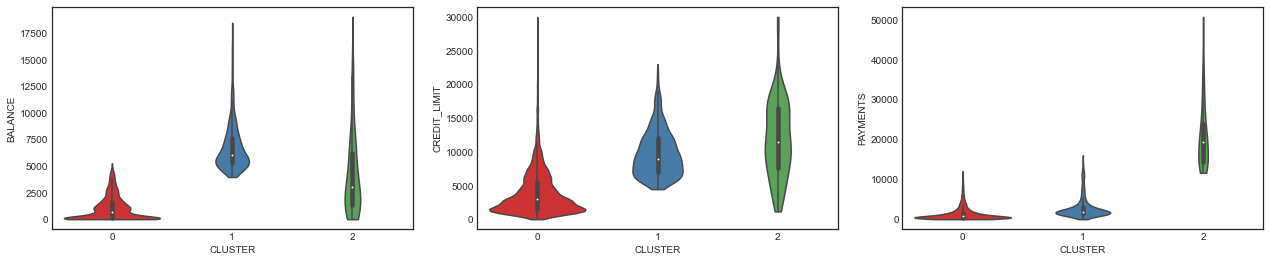

In [45]:
plot_violin(X_gmm, 1, 3, 18, 4)

The following are the comparison of silhouette scores for each algorithm within a range number of cluster:
 - **Single Linkage**, **Complete Linkage**, and **Average Linkage** are excluded from the model selection process. Although their cluster results produce very high silhouette scores, the distribution of cluster membership is very unrealistic. For example, single linkage clustering will create 3 clusters with 8947 members in cluster 0, 1 member in cluster 1, and 1 member in cluster 2.
 - The cluster results from **Full Covariance GMM**, **Spherical Covariance GMM**, and **Diag Covariance GMM** do not produce good silhouette scores, so we also exclude them from the model selection process.
 - Generally, silhouette score decreases when the customers are segmented into 4 clusters. Within 3 clusters, **Ward Linkage** has better silhouette score (0.546) compared to **K-Means** (0.519) and **Tied Covariance GMM** (0.508). We decided to choose Ward Linkage that segment customer into 3 clusters as the final model.

In [46]:
models = ['kmeans', 'single', 'complete', 'average', 'ward', 'full', 'tied', 'spherical', 'diag']
model_selection = pd.DataFrame(columns=range(2, 11), index=models)
model_selection.loc['kmeans', :] = kmeans_evaluation['silhouette']
model_selection.loc['single', :] = agglo_evaluation[('single', 'silhouette')]
model_selection.loc['complete', :] = agglo_evaluation[('complete', 'silhouette')]
model_selection.loc['average', :] = agglo_evaluation[('average', 'silhouette')]
model_selection.loc['ward', :] = agglo_evaluation[('ward', 'silhouette')]
model_selection.loc['full', :] = gmm_evaluation[('full', 'silhouette')]
model_selection.loc['tied', :] = gmm_evaluation[('tied', 'silhouette')]
model_selection.loc['spherical', :] = gmm_evaluation[('spherical', 'silhouette')]
model_selection.loc['diag', :] = gmm_evaluation[('diag', 'silhouette')]
model_selection

2      3      4      5      6      7      8      9      10
kmeans     0.548  0.519  0.448  0.463  0.453  0.444  0.428  0.348   0.36
single     0.888   0.84   0.84   0.84  0.841  0.774  0.773  0.773  0.771
complete   0.812  0.701    0.7  0.673  0.673  0.547  0.546  0.545  0.541
average    0.865  0.775   0.75   0.75  0.749  0.725  0.725  0.587  0.585
ward       0.559  0.546  0.319   0.33  0.339  0.338  0.321  0.323  0.334
full       0.444  0.294  0.066  0.051   0.04  0.056  0.036  0.037   0.03
tied       0.509  0.508  0.518  0.533  0.454  0.469  0.471  0.401  0.355
spherical  0.436  0.366  0.335  0.345  0.228  0.253  0.263  0.308    0.3
diag       0.457  0.311  0.207  0.224  0.099  0.087  0.096  0.104  0.079

## Cluster Analysis
Based on the results of the silhouette score and the visualization of the separation between clusters, we choose the **Ward Linkage** as the final cluster model. To be able to interpret the behavior characteristics of each cluster, we made several visualizations as follows:

1. Clusters visualization in 2D and 3D
2. Boxplot (exclude outliers)

In [47]:
plot_scatter(X_agglo, selected_cols, 'Ward Linkage', 1000, 750)

In [48]:
plot_scatter_3d(X_agglo, 'PAYMENTS', 'CREDIT_LIMIT', 'BALANCE', 'Ward Linkage')

In [49]:
# Create a new data frame that combine the final cluster result with the initial dataset 
credit_card_cluster = pd.concat([credit_card, X_agglo['CLUSTER']], axis=1)
credit_card_cluster_0 = credit_card_cluster[credit_card_cluster['CLUSTER'] == 0]
credit_card_cluster_1 = credit_card_cluster[credit_card_cluster['CLUSTER'] == 1]
credit_card_cluster_2 = credit_card_cluster[credit_card_cluster['CLUSTER'] == 2]

In [50]:
# Function for generate descriptive statistics for each clusters
def desc_no_outliers(df):
    desc = df[selected_cols].describe().transpose()[['min', '25%', '50%', '75%', 'max']]
    desc['IQR'] = desc['75%'] - desc['25%']
    desc['upper'] = desc['75%'] + desc['IQR']
    desc['lower'] = desc[['25%', 'IQR']].apply(lambda x: 0 if (x['25%'] - x['IQR']) <= 0 else x['25%'] - x['IQR'], axis=1)
    desc =  desc[['min', 'lower', '25%', '50%', '75%', 'upper', 'max']]
    return desc

desc_cluster_0 = desc_no_outliers(credit_card_cluster_0)
desc_cluster_1 = desc_no_outliers(credit_card_cluster_1)
desc_cluster_2 = desc_no_outliers(credit_card_cluster_2)
desc_total = pd.concat([desc_cluster_0, desc_cluster_1, desc_cluster_2])

cluster_desc = pd.DataFrame(
    columns=['min', 'lower', '25%', '50%', '75%', 'upper', 'max'], 
    index=pd.MultiIndex.from_product([['CLUSTER 0', 'CLUSTER 1', 'CLUSTER 2'], selected_cols])
)

for i in range(9):
    cluster_desc.iloc[i, :] = desc_total.iloc[i, :]
cluster_desc.transpose()

CLUSTER 0                         CLUSTER 1                          \
        BALANCE CREDIT_LIMIT  PAYMENTS    BALANCE CREDIT_LIMIT   PAYMENTS   
min         0.0        150.0       0.0        0.0         50.0        0.0   
lower       0.0          0.0       0.0        0.0       3500.0        0.0   
25%      92.277       1500.0   326.627    835.579       7500.0   1225.332   
50%     640.809       2500.0   668.979   3935.179       9500.0   2011.354   
75%     1480.83       4500.0  1428.791   5858.865      11500.0   4661.774   
upper  2869.382       7500.0  2530.954   10882.15      15500.0   8098.215   
max    5274.509       9000.0  7228.692  18495.559      30000.0  14399.703   

       CLUSTER 2                          
         BALANCE CREDIT_LIMIT   PAYMENTS  
min        4.383       2500.0    7566.47  
lower        0.0       4000.0   3462.021  
25%     2306.699      10000.0  13002.304  
50%      5312.29      12000.0  17068.967  
75%      8220.74      16000.0  22542.587  
upper  14134.781      22000.0   32082.87  
max    19043.139      30000.0  50721.483

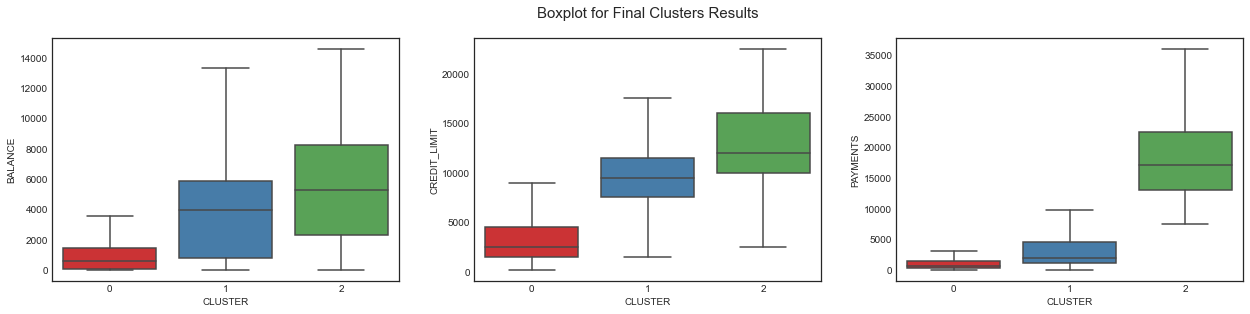

In [51]:
# Generate boxplot with outliers excluded for analysis purpose
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for cols, ax in zip(selected_cols, axes.flatten()):
    sns.boxplot(ax=ax, data=credit_card_cluster, x='CLUSTER', y=cols, palette='Set1', showfliers=False)
axes[1].set_title('Boxplot for Final Clusters Results', size=15, pad=20)
plt.tight_layout(pad=3)

From visualization and descriptive statistics above, we can conclude:
### CLUSTER 0 (LOW SPENDERS)
This cluster consist of 80% credit card customers who have **LOW `BALANCES`**, **LOW `PAYMENTS`**, and **LOW `CREDIT_LIMIT`**.
- `BALANCE`: 0 – 4000
- `CREDIT_LIMIT`: 0 – 10000
- `PAYMENTS`: 0 – 4000
### CLUSTER 1 (MEDIUM SPENDERS)
This cluster consist of 18% credit card customers who have **LOW-MEDIUM `BALANCES`**, **MEDIUM `PAYMENTS`**, and **MEDIUM `CREDIT_LIMIT`**
- `BALANCE`: 0 – 13000
- `CREDIT_LIMIT`: 2500 – 17500
- `PAYMENTS`: 0 – 10000
### CLUSTER 2 (HIGH SPENDER)
This cluster consist of 2% credit card customers who have **LOW-HIGH `BALANCES`**, **HIGH `PAYMENTS`**, and **HIGH `CREDIT_LIMIT`**
- `BALANCE`: 0 – 14000
- `CREDIT_LIMIT`: 3000 – 25000
- `PAYMENTS`: 7000 – 35000

# VI. Recommendations
## Credit Card Product
### PWDK Silver Credit Card
- Maximum credit limit value around \$9.000 to \$10.000
- Annual fees **LOW** or can be waived
- Rewards:
    - PWDK Bank points
    - Cash back **LOW** (we prioritize the cash back for purchasing daily necessities with the aim of increase credit card usage) 
### PWDK Gold Credit Card
- Maximum credit limit value around \$16.000 to \$18.000
- Annual fees **MEDIUM**
- Rewards:
    - PWDK Bank points
    - Cash back **MEDIUM**
    - Travel miles points **LOW** for each credit card usage
### PWDK Platinum Credit Card
- Maximum credit limit value around \$22.000 (there is a high possibility that the bank will increase this value to much higher value according to customer payment capability)
- Annual fees **HIGH**
- Rewards:
    - PWDK Bank points
    - Cash back **HIGH** (offers cash back for purchasing high value products)
    - Travel miles points **HIGH** for each credit card usage
    - Free premium service at the airport

# VII. Business Impact
Based on data from Statista, we know that the average churn rate in 2020 for the financial and credit sector is 25%. According to Bain & Company, by migrating to the right customer relationships and improving the value proposition, customer segmentation can increase retention by 4% and increase profits by 11%. From other sources, retention may increase varies from a range of 3-5%.  After having a market segment, we assume that the customer retention rate at PWDK Bank will increase 3%-5% with each customer return $120 in profit by using our credit card product.

In [52]:
# initial estimated company profit
customer = 8950
profit = 120
retention_rate = 0.75
initial_profit = retention_rate * customer * profit # with churn rate 25%
print(f"Estimated profit generated by the company in a year         : {int(initial_profit)}")

# estimated company profit by increasing retention rate by 3%
estimated_profit_3 = (retention_rate + 0.03)* customer * profit 
print(f"Expected profit by increasing customer retention rate by 3% : {int(estimated_profit_3)}")

# estimated company profit by increasing retention rate by 3%
estimated_profit_5 = (retention_rate + 0.05)* customer * profit 
print(f"Expected profit by increasing customer retention rate by 5% : {int(estimated_profit_5)}")

# percentage profit
delta_3 = ((estimated_profit_3 - initial_profit) / initial_profit) * 100
delta_5 = ((estimated_profit_5 - initial_profit) / initial_profit) * 100
print(f"\nCredit card customer segmentation can increase company profit by {np.round(delta_3, 1)}%-{np.round(delta_5, 1)}%")

Estimated profit generated by the company in a year         : 805500
Expected profit by increasing customer retention rate by 3% : 837720
Expected profit by increasing customer retention rate by 5% : 859200

Credit card customer segmentation can increase company profit by 4.0%-6.7%
